In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re  # Regular expressions to extract the optname
import glob
import json 

In [ ]:
with open('CIFAR10_100_42_Drichlet_0.300_default__FedAvg_sgd_2025-04-20_03-46-32.json', 'r') as file:
    data = json.load(file)

In [25]:
def simple_deserialize(obj):
    if isinstance(obj, dict):
        return {k: simple_deserialize(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [simple_deserialize(v) for v in obj]
    elif isinstance(obj, str):
        # Try to convert to int
        if obj.isdigit() or (obj.startswith('-') and obj[1:].isdigit()):
            return int(obj)
        # Try to convert to float
        try:
            return float(obj)
        except ValueError:
            pass
        # Try to convert to bool
        if obj.lower() == 'true':
            return True
        if obj.lower() == 'false':
            return False
        return obj  # leave as string
    else:
        return obj


In [26]:
data = simple_deserialize(data)

In [38]:
cos_sim = []
for i in data.keys():
    try:
        int(i)
        cos_sim.append([int(i),abs(float(data[i]["Average Cosine Similarity (Global Grad)"]))])
    except:
        continue

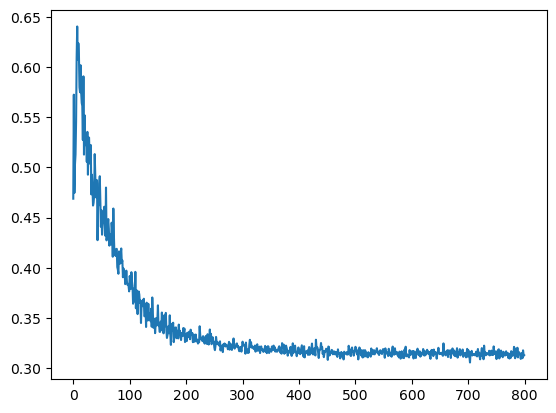

In [39]:
cos_sim = np.array(cos_sim)
plt.plot(cos_sim[:,0],cos_sim[:,1])

['CIFAR10_10_42_Drichlet_0.300_default__FedAvg_sgd.csv', 'CIFAR10_10_42_Drichlet_0.300_default__FedSAM_Hessian_1_sgd.csv', 'CIFAR10_10_42_Drichlet_0.300_default__FedSAM_Hessian_2_sgd.csv', 'CIFAR10_10_42_Drichlet_0.300_default__FedSAM_Hessian_5_sgd.csv', 'CIFAR10_10_42_Drichlet_0.300_default__FedSAM_regular_sgd.csv', 'CIFAR10_10_42_Drichlet_0.300_default__FedSAM_R_sgd.csv', 'CIFAR10_10_42_Drichlet_0.300_default__FedSAM_Trace_1_sgd.csv', 'CIFAR10_10_42_Drichlet_0.300_default__FedSAM_Trace_2_sgd.csv']


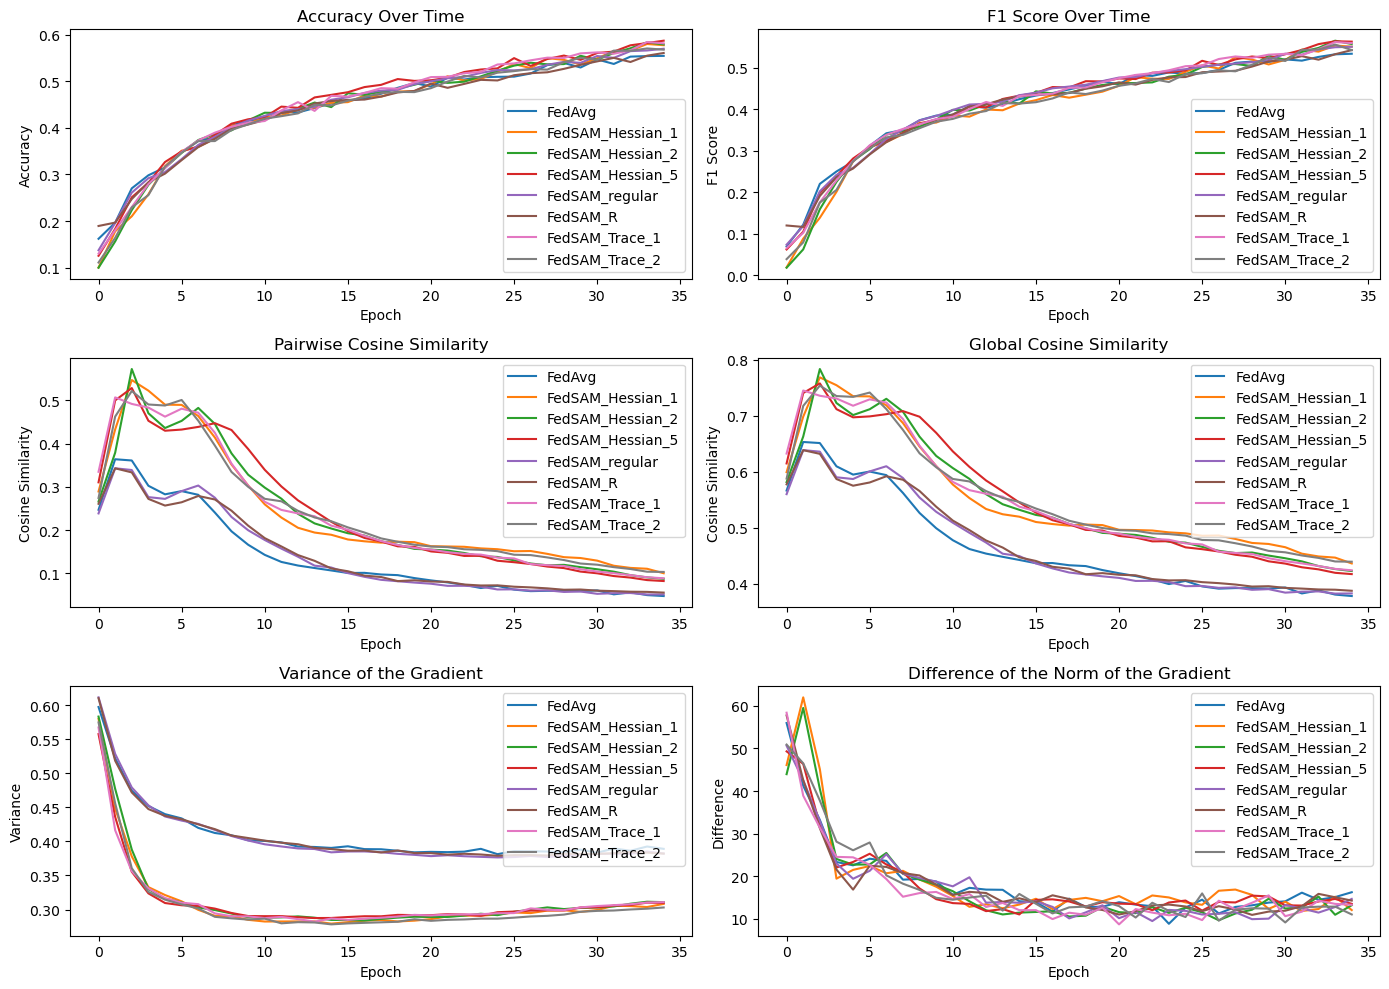

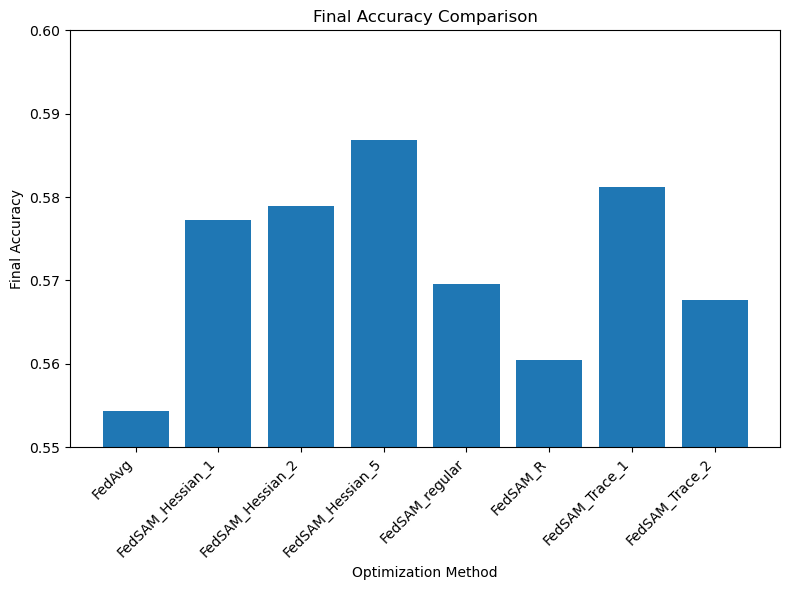

In [6]:
# Assuming you have 5 .csv filenames in a list
csv_files = glob.glob('*.csv')
print(csv_files)
# Data storage
accuracies = []
f1_scores = []
pairwise_cosines = []
global_cosines = []
final_accuracies = []
optnames = []
var_grad = []
difference_norm = []
# Function to extract optname from filename
def extract_optname(filename):
    # Use regex to find the between '__' and '_sgd'
    match = re.search(r'__([A-Za-z0-9_]+)_sgd', filename)
    if match:
        return match.group(1)
    return "Unknown"

# Read and process each CSV file

for file in csv_files:
    df = pd.read_csv(file)
    
    # Extract required rows based on the first column values (e.g., 'Accuracy')
    accuracy = df.loc[df.iloc[:, 0] == 'Accuracy'].values[0, 1:]
    f1_score = df.loc[df.iloc[:, 0] == 'F1 Score'].values[0, 1:]
    pairwise_cosine = df.loc[df.iloc[:, 0] == 'Average Cosine Similarity (Pairwise Grad)'].values[0, 1:]
    global_cosine = df.loc[df.iloc[:, 0] == 'Average Cosine Similarity (Global Grad)'].values[0, 1:]
    variance_grad = df.loc[df.iloc[:, 0] == 'Variance Grad'].values[0, 1:]
    diff_norm = df.loc[df.iloc[:, 0] == 'Difference of Norm (Grad)'].values[0, 1:]
    
    # Extract the optname from the filename
    optname = extract_optname(file)
    optnames.append(optname)
    
    # Store the data
    accuracies.append(accuracy)
    f1_scores.append(f1_score)
    pairwise_cosines.append(pairwise_cosine)
    global_cosines.append(global_cosine)
    var_grad.append(variance_grad)
    difference_norm.append(diff_norm)
    
    # Store the final accuracy
    final_accuracies.append(accuracy[-1])

# Convert to numpy arrays for plotting
accuracies = np.array(accuracies)
f1_scores = np.array(f1_scores)
pairwise_cosines = np.array(pairwise_cosines)
global_cosines = np.array(global_cosines)
final_accuracies = np.array(final_accuracies)
var_grad = np.array(var_grad)
difference_norm = np.array(difference_norm)

# Plotting
fig, ax = plt.subplots(3, 2, figsize=(14, 10))

# Accuracy vs F1 Score
ax[0, 0].plot(accuracies.T, label=optnames)
ax[0, 0].set_title('Accuracy Over Time')
ax[0, 0].set_xlabel('Epoch')
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].legend()

ax[0, 1].plot(f1_scores.T, label=optnames)
ax[0, 1].set_title('F1 Score Over Time')
ax[0, 1].set_xlabel('Epoch')
ax[0, 1].set_ylabel('F1 Score')
ax[0, 1].legend()

# Cosine similarities
ax[1, 0].plot(pairwise_cosines.T, label=optnames)
ax[1, 0].set_title('Pairwise Cosine Similarity')
ax[1, 0].set_xlabel('Epoch')
ax[1, 0].set_ylabel('Cosine Similarity')
ax[1, 0].legend()

ax[1, 1].plot(global_cosines.T, label=optnames)
ax[1, 1].set_title('Global Cosine Similarity')
ax[1, 1].set_xlabel('Epoch')
ax[1, 1].set_ylabel('Cosine Similarity')
ax[1, 1].legend()

# Variance of the gradient
ax[2, 0].plot(var_grad.T, label=optnames)
ax[2, 0].set_title('Variance of the Gradient')
ax[2, 0].set_xlabel('Epoch')
ax[2, 0].set_ylabel('Variance')
ax[2, 0].legend()

# Difference of the norm of the gradient
ax[2,1].plot(difference_norm.T, label=optnames)
ax[2,1].set_title('Difference of the Norm of the Gradient')
ax[2,1].set_xlabel('Epoch')
ax[2,1].set_ylabel('Difference')
ax[2,1].legend()

plt.tight_layout()
plt.show()

# Final accuracy bar chart
plt.figure(figsize=(8, 6))
plt.bar(optnames, final_accuracies)
plt.title('Final Accuracy Comparison')
plt.xlabel('Optimization Method')
plt.ylabel('Final Accuracy')
plt.xticks(rotation=45, ha="right")  # Rotate the labels for readability
plt.ylim((0.55,0.60))
plt.tight_layout()
plt.show()